Reference link:
https://sginvestors.io/sgx/reit-listing/alpha (All REITs listed in SGX)

Alpha Vantage API key: A0D7GYFRH2XWP8E3

In [181]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [182]:
tickers = ["O5RU.SI", "XZL.SI"]

Ticker: O5RU.SI
Date
2019-02-13 00:00:00+08:00    0.024959
2019-05-03 00:00:00+08:00    0.027455
2019-08-02 00:00:00+08:00    0.024959
2019-11-12 00:00:00+08:00    0.024959
2020-02-07 00:00:00+08:00    0.024959
2020-05-19 00:00:00+08:00    0.019967
2020-08-03 00:00:00+08:00    0.019967
2020-11-03 00:00:00+08:00    0.019967
2021-02-04 00:00:00+08:00    0.020466
2021-05-12 00:00:00+08:00    0.028952
2021-08-05 00:00:00+08:00    0.022463
2021-10-26 00:00:00+08:00    0.024959
2022-02-09 00:00:00+08:00    0.023461
2022-05-09 00:00:00+08:00    0.023561
2022-08-03 00:00:00+08:00    0.022762
2022-11-03 00:00:00+08:00    0.024160
2023-02-02 00:00:00+08:00    0.025857
2023-05-12 00:00:00+08:00    0.026496
2023-06-08 00:00:00+08:00    0.018000
2023-08-04 00:00:00+08:00    0.005100
2023-11-14 00:00:00+08:00    0.023400
2024-02-08 00:00:00+08:00    0.023400
2024-05-15 00:00:00+08:00    0.023700
Name: Dividends, dtype: float64



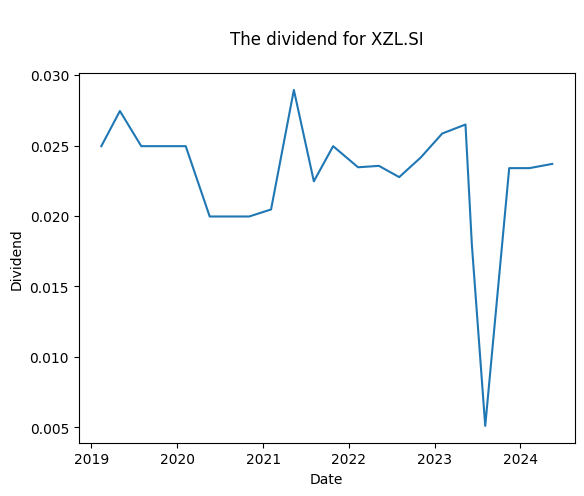

Ticker: XZL.SI
Date
2020-02-27 00:00:00+08:00    0.060777
2022-03-02 00:00:00+08:00    0.004821
2023-03-02 00:00:00+08:00    0.021551
2023-08-17 00:00:00+08:00    0.020457
2024-02-29 00:00:00+08:00    0.025868
Name: Dividends, dtype: float64



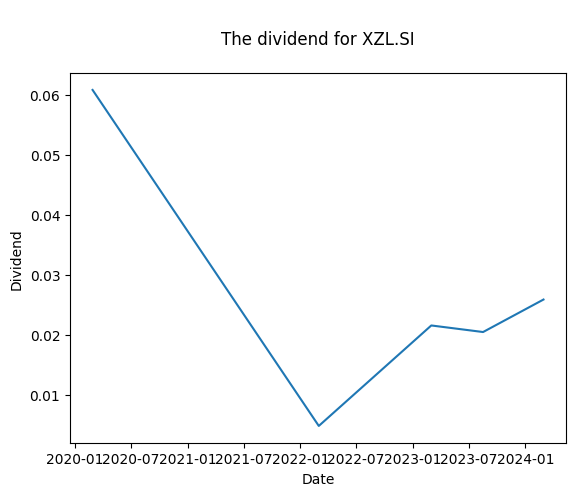

In [163]:
# Dividend yield
for ticker in tickers:
    ticker = yf.Ticker(ticker) #Creating an instance of the Ticker class for the specified stock ticker symbol
    dividend = ticker.dividends
    dividend_filtered = dividend.loc['2019-1-1':]
    print(f"Ticker: {ticker.ticker}")
    print(dividend_filtered)
    print()

    plt.plot(dividend_filtered.index, dividend_filtered)
    plt.xlabel('Date')
    plt.ylabel('Dividend')
    plt.title(f"\n{'The dividend for'} {tickers[i]}\n")
    plt.show()

2024-03-31    810563819.0
2023-09-30    809106978.0
2023-03-31    721534706.0
Name: Ordinary Shares Number, dtype: object
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-31 00:00:00 -> 2024-04-01 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-30 00:00:00 -> 2024-03-31 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-29 00:00:00 -> 2024-03-30 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2023-09-30 00:00:00 -> 2023-10-01 00:00:00)
2023-12-31    576861944.0
2023-06-30    576861944.0
2022-12-31    569199000.0
Name: Ordinary Shares Number, dtype: object
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-31 00:00:00 -> 2024-01-01 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-30 00:00:00 -> 2023-12-31 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2022-12-31 00:00:00 -> 2023-01-01 00:00:00)

The quaterly price-to-book (PB) ratio for O5RU.SI

        Date  Book Va

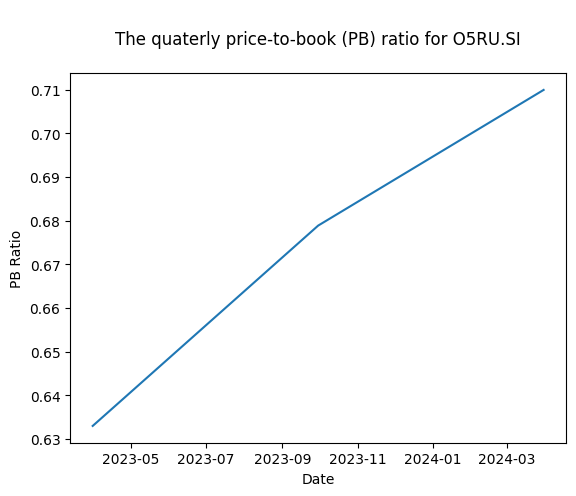

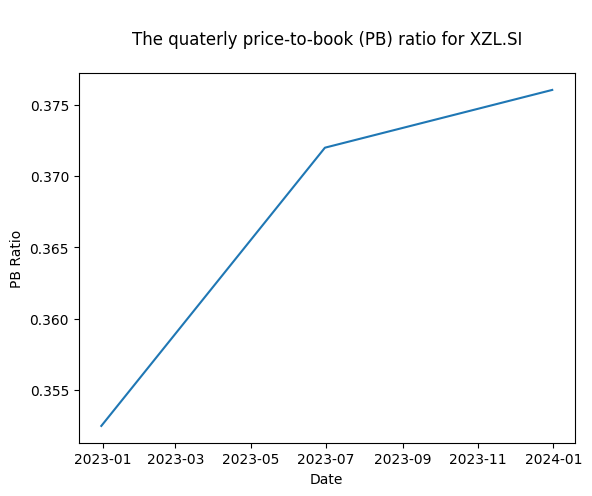

In [195]:
# PB Ratio
# PB Ratio = Price per Share / Book Value per Share
# Book Value per share = Stockholders' Equity(Total Assets - Total Liabilities) / Number of Outstanding Shares(Ordinary Shares Number)
pb_ratio_table_all = []
for ticker in tickers:
    ticker = yf.Ticker(ticker)
    book_value = ((ticker.quarterly_balance_sheet.loc['Stockholders Equity',:] / ticker.quarterly_balance_sheet.loc['Ordinary Shares Number',:]).astype(float))
    print(ticker.quarterly_balance_sheet.loc['Ordinary Shares Number',:])
    price_history = []
    for date in book_value.index:
        while True:
            if not (ticker.history(start=date, end=date+dt.timedelta(days=1)).empty):
                price = (ticker.history(start=date, end=date+dt.timedelta(days=1)).loc[:, 'Close'].iloc[0])
                price_history.append(price)
                break
            else:
                date = date - pd.DateOffset(days=1)   

    pb_ratio_table = pd.DataFrame({'Date': book_value.index, 'Book Value': book_value, 'Price': price_history})
    pb_ratio = pb_ratio_table['Price'] / pb_ratio_table['Book Value']
    pb_ratio_table = pd.DataFrame({'Date': book_value.index, 'Book Value': book_value.values, 'Price': price_history, 'PB Ratio':pb_ratio.values})
    pb_ratio_table_all.append(pb_ratio_table)

for i, pb_ratio_table in enumerate(pb_ratio_table_all):
    print(f"\n{'The quaterly price-to-book (PB) ratio for'} {tickers[i]}\n")
    print(pb_ratio_table)           

for i, pb_ratio_table in enumerate(pb_ratio_table_all):
    plt.plot(pb_ratio_table['Date'], pb_ratio_table['PB Ratio'])     
    plt.xlabel('Date')
    plt.ylabel('PB Ratio')
    plt.title(f"\n{'The quaterly price-to-book (PB) ratio for'} {tickers[i]}\n")
    plt.show()


$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-31 00:00:00 -> 2024-04-01 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-30 00:00:00 -> 2024-03-31 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-29 00:00:00 -> 2024-03-30 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-31 00:00:00 -> 2024-01-01 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-30 00:00:00 -> 2023-12-31 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2022-12-31 00:00:00 -> 2023-01-01 00:00:00)

The annual price-to-book (PB) ratio for O5RU.SI

        Date  Book Value     Price  PB Ratio
0 2024-03-31    1.769477  1.256300  0.709984
1 2023-03-31    1.895120  1.199580  0.632983
2 2022-03-31    1.913909  1.176086  0.614494
3 2021-03-31    1.536201  1.019211  0.663462
4 2020-03-31         NaN  0.769249       NaN

The annual price-to-book (PB) ratio for XZL.SI

        Date  Book Value     Price  PB Ratio
0

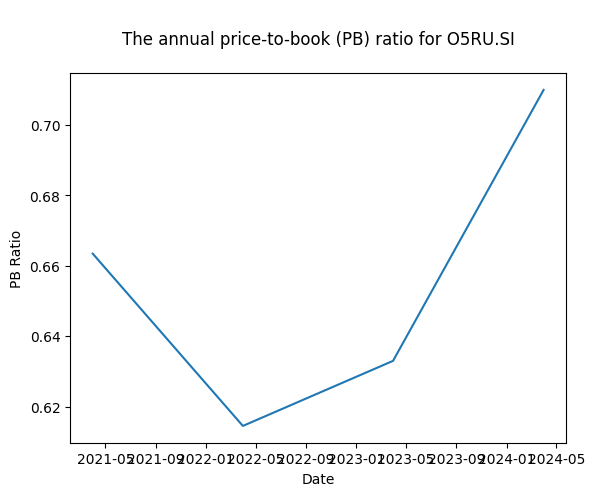

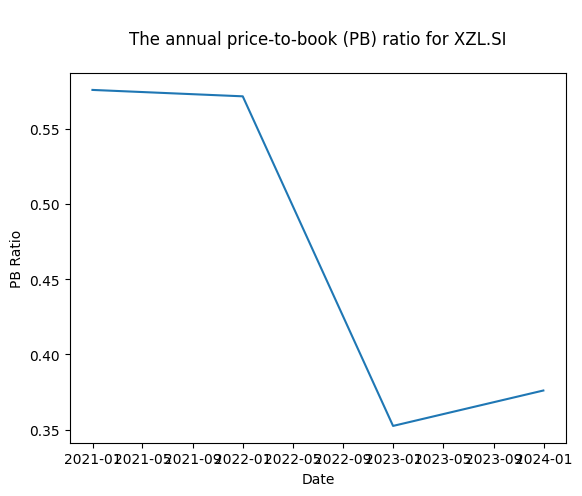

In [161]:
pb_ratio_table_all = []
for ticker in tickers:
    ticker = yf.Ticker(ticker)
    book_value = ((ticker.balance_sheet.loc['Stockholders Equity',:] / ticker.balance_sheet.loc['Ordinary Shares Number',:]).astype(float))
    price_history = []
    for date in book_value.index:
        while True:
            if not (ticker.history(start=date, end=date+dt.timedelta(days=1)).empty):
                price = (ticker.history(start=date, end=date+dt.timedelta(days=1)).loc[:, 'Close'].iloc[0])
                price_history.append(price)
                break
            else:
                date = date - pd.DateOffset(days=1)   

    pb_ratio_table = pd.DataFrame({'Date': book_value.index, 'Book Value': book_value, 'Price': price_history})
    pb_ratio = pb_ratio_table['Price'] / pb_ratio_table['Book Value']
    pb_ratio_table = pd.DataFrame({'Date': book_value.index, 'Book Value': book_value.values, 'Price': price_history, 'PB Ratio':pb_ratio.values})
    pb_ratio_table_all.append(pb_ratio_table)

for i, pb_ratio_table in enumerate(pb_ratio_table_all):
    print(f"\n{'The annual price-to-book (PB) ratio for'} {tickers[i]}\n")
    print(pb_ratio_table)    

for i, pb_ratio_table in enumerate(pb_ratio_table_all):
    plt.plot(pb_ratio_table['Date'], pb_ratio_table['PB Ratio'])     
    plt.xlabel('Date')
    plt.ylabel('PB Ratio')
    plt.title(f"\n{'The annual price-to-book (PB) ratio for'} {tickers[i]}\n")
    plt.show()            


$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-31 00:00:00 -> 2024-04-01 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-30 00:00:00 -> 2024-03-31 00:00:00)
$O5RU.SI: possibly delisted; No price data found  (1d 2024-03-29 00:00:00 -> 2024-03-30 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-31 00:00:00 -> 2024-01-01 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2023-12-30 00:00:00 -> 2023-12-31 00:00:00)
$XZL.SI: possibly delisted; No price data found  (1d 2022-12-31 00:00:00 -> 2023-01-01 00:00:00)

The NAV per share for O5RU.SI

        Date           NAV     Price  NAV per Share
0 2024-03-31  1.434274e+09  1.256300   1.141665e+09
1 2023-03-31  1.367395e+09  1.199580   1.139895e+09
2 2022-03-31  1.373742e+09  1.176086   1.168062e+09
3 2021-03-31  1.087371e+09  1.019211   1.066875e+09
4 2020-03-31           NaN  0.769249            NaN

The NAV per share for XZL.SI

        Date          NAV     Price  NAV

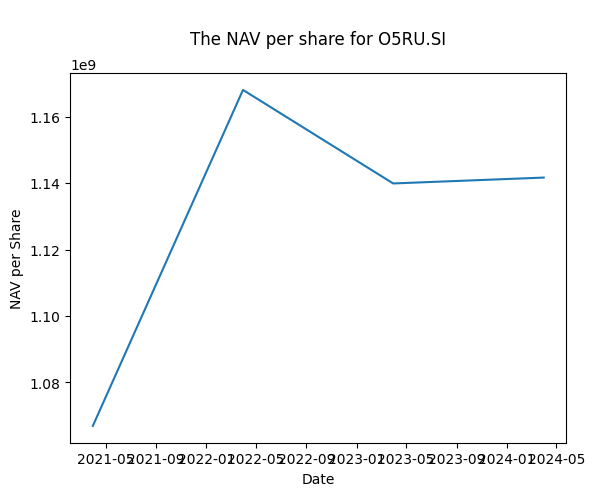

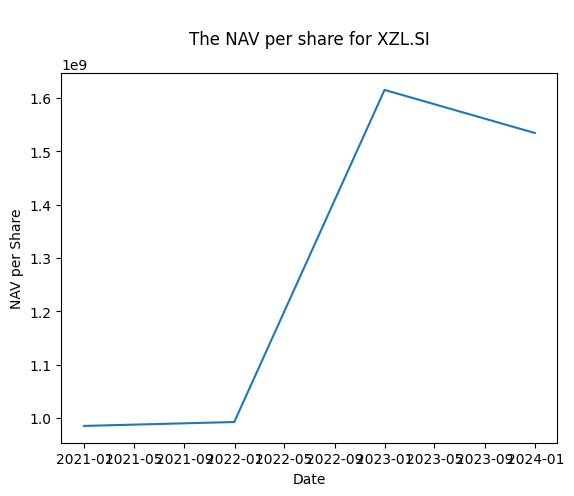

In [194]:
# Net Asset Value per Share
# NAV = Total assets (Total Assets - bs) - Total liabilities (Total Liabilities Net Minority Interest - bs)
# NAV per share = NAV / price per share 
nav_per_share_table_all = []
for ticker in tickers: 
    ticker = yf.Ticker(ticker)
    nav = ((ticker.balance_sheet.loc['Total Assets',:] - ticker.balance_sheet.loc['Total Liabilities Net Minority Interest',:]).astype(float))

    price_history = []
    for date in nav.index:
        while True:
            if not (ticker.history(start=date, end=date+dt.timedelta(days=1)).empty):
                price = (ticker.history(start=date, end=date+dt.timedelta(days=1)).loc[:, 'Close'].iloc[0])
                price_history.append(price)
                break
            else:
                date = date - pd.DateOffset(days=1) 

    nav_per_share_table = pd.DataFrame({'Date': nav.index, 'NAV': nav.values, 'Price': price_history})
    nav_per_share = nav_per_share_table['NAV'] / nav_per_share_table['Price']
    nav_per_share_table = pd.DataFrame({'Date': nav.index, 'NAV': nav.values, 'Price': price_history, 'NAV per Share': nav_per_share})
    nav_per_share_table_all.append(nav_per_share_table)

for i, nav_per_share_table in enumerate(nav_per_share_table_all):
    print(f"\n{'The NAV per share for'} {tickers[i]}\n")
    print(nav_per_share_table)    

for i, nav_per_share_table in enumerate(nav_per_share_table_all):
    plt.plot(nav_per_share_table['Date'], nav_per_share_table['NAV per Share'])     
    plt.xlabel('Date')
    plt.ylabel('NAV per Share')
    plt.title(f"\n{'The NAV per share for'} {tickers[i]}\n")
    plt.show()     

